In [1]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from classy import Class
from scipy.optimize import fsolve
from math import pi

In [2]:
#import the data needed to resolve the problem
data = open("TFG03.dat", "r")

#add the data to different lists
l_exp = np.array([])
tCl_exp = np.array([])
for line in data.readlines():
    lista = line.split()
    l_exp = np.append(l_exp, float(lista[0]))
    tCl_exp = np.append(tCl_exp, float(lista[1]))


In [3]:
# Variable wished to determine
var_name = 'Omega_k'
var_array = np.linspace(0.08,0.22,15)
var_num = len(var_array)
var_legend = r'$\Omega_\mathrm{k}$'
var_figname = 'Omega_k'

# Fixed settings
common_settings = {# LambdaCDM parameters
                   'recombination': 'RECFAST',
                   'h':0.51,
                   'T_cmb':2.7,
                   'omega_b':0.022,
                   'omega_cdm':0.15,
                   'A_s':2.2e-9,
                   'n_s':0.965,
                   'z_reio':11.357,
                   'N_ur':3.3,
                   # output and precision parameters
                   'output':'tCl,pCl,lCl,mPk',
                   }

#Other variables
twopi = 2.*pi

# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [4]:
#Deviation of data
chi2 = []

M = Class()
# loop over varying parameter values
for i,var in enumerate(var_array):
    print (' * Compute with %s=%f'%(var_name,var)) 

    # call CLASS
    M.set(common_settings)
    M.set({var_name:var})
    M.compute()

    # get Cls
    clM = M.raw_cl(2500)
    ll = clM['ell'][2:]
    clTT = clM['tt'][2:]
    clEE = clM['ee'][2:]
    clPP = clM['pp'][2:]

    tCl = clTT*ll*(ll+1)/twopi

    #Sum over the deviation of cl
    chi2.append(sum((tCl-tCl_exp)*(tCl-tCl_exp)))

    # reset CLASS
    M.empty()

 * Compute with Omega_k=0.080000
 * Compute with Omega_k=0.090000
 * Compute with Omega_k=0.100000
 * Compute with Omega_k=0.110000
 * Compute with Omega_k=0.120000
 * Compute with Omega_k=0.130000
 * Compute with Omega_k=0.140000
 * Compute with Omega_k=0.150000
 * Compute with Omega_k=0.160000
 * Compute with Omega_k=0.170000
 * Compute with Omega_k=0.180000
 * Compute with Omega_k=0.190000
 * Compute with Omega_k=0.200000
 * Compute with Omega_k=0.210000
 * Compute with Omega_k=0.220000


Experimental value of Omega_k = 0.15


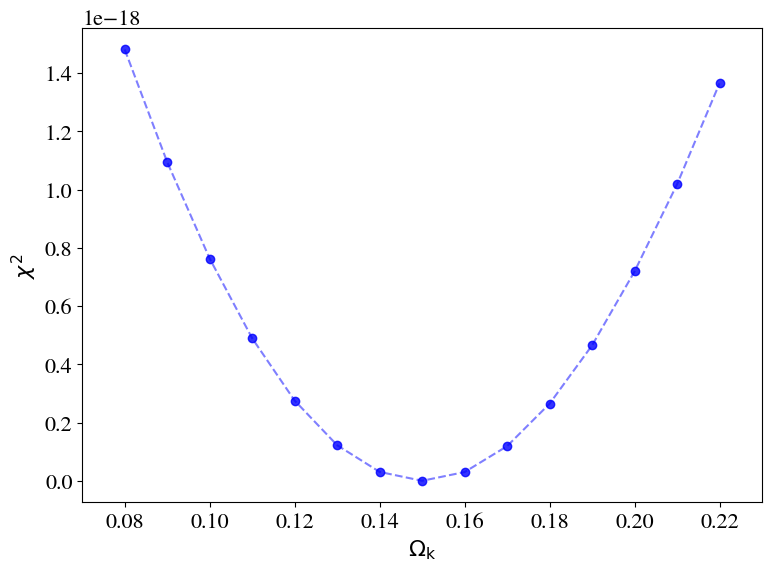

In [6]:
#Error figure
fig_err, ax_err = plt.subplots()

#plot chi2 error
ax_err.scatter(var_array,chi2, color='b', alpha = 0.8)
ax_err.plot(var_array,chi2, color='b', alpha = 0.5, linestyle='--')

# output chi2 error figure
ax_err.set_xlim([0.07,0.23])
ax_err.set_xlabel(r'$\Omega_\mathrm{k}$')
ax_err.set_ylabel(r'$\chi^2$')
fig_err.tight_layout()
fig_err.savefig('TFG03.png')  

#output value for omega_cdm minimum
var_min = var_array[chi2.index(min(chi2))]
print('Experimental value of', var_name, '=', np.round(var_min,3))
